# Discrete Fourier Transform

We consider $f$ periodic of period $T$. We sample $f$ with $n$ points $t_j = \frac{jT}{n}$ uniformly spaced over $[0, T]$. We suppose $n$ to be a power of $2$.

$$ a_k = \sum_{j=0}^{n-1}f(t_j) e^{-\frac{2i \pi j k}{n}} $$

$$ f(t_k) = \frac{1}{n}\sum_{j=0}^{n-1}a_j e^{\frac{2i \pi j k}{n}} = 
\frac{1}{n}\sum_{j=0}^{n/2-1}a_j e^{\frac{2i \pi j k}{n}} + 
\frac{1}{n}a_{n/2} e^{\frac{2i \pi \frac{n}{2} k}{n}} +
\frac{1}{n}\sum_{j=n/2+1}^{n-1}a_j e^{\frac{2i \pi j k}{n}}
$$
$$ f(t_k) =
\frac{1}{n}\sum_{j=0}^{n/2-1}a_j e^{\frac{2i \pi j t_k}{T}} + 
\frac{1}{2n}a_{\frac{n}{2}} e^{2i \pi \frac{n}{2} \frac{k}{n}} +
\frac{1}{2n}a_{\frac{n}{2}} e^{2i \pi (n - \frac{n}{2}) \frac{k}{n}} +
\frac{1}{n}\sum_{j=n/2+1}^{n-1}a_j e^{\frac{2i \pi (j-n) t_k}{T}}
$$
$$ f(t_k) =
\frac{1}{n}\left(
\sum_{j=0}^{n/2-1}a_j e^{\frac{2i \pi j t_k}{T}} + 
a_{\frac{n}{2}}cos(\pi n \frac{t_k}{T}) +
\sum_{j=n/2+1}^{n-1}a_j e^{\frac{2i \pi (j-n) t_k}{T}}
\right)
$$

Under some assumptions...

$$ f'(t_k) =
\frac{1}{n}\left(
\sum_{j=0}^{n/2-1}\frac{2i \pi j}{T}a_j e^{\frac{2i \pi j t_k}{T}} - 
\frac{\pi n }{T}a_{\frac{n}{2}}sin(\pi n \frac{t_k}{T}) +
\sum_{j=n/2}^{n-1}\frac{2i \pi (j-n)}{T}a_j e^{\frac{2i \pi (j-n) t_k}{T}}
\right)
$$

Or 
$$sin(\pi n \frac{t_k}{T}) = sin(\pi n \frac{k}{n}) = sin(k\pi) = 0 $$

Donc
$$f'(t_k) = \frac{1}{n}
\sum_{j=0}^{n-1}\frac{2i \pi}{T}b_ja_j e^{\frac{2i \pi j t_k}{T}}$$ 

avec

$b_j = j$   si   $0 \le j \le \frac{n}{2} - 1$, 

$b_\frac{n}{2} = 0$ , 

$b_j = j-n$   si   $\frac{n}{2} + 1 \le j \le n-1$ 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def fft(Z):
    n = len(Z)
    if n <= 1:
        return Z.copy()
    else:
        assert(n % 2 == 0)
        even = fft(Z[::2])
        odd = fft(Z[1::2])
        result = np.zeros_like(Z, dtype=complex)
        factors = np.exp(-2*1j*np.pi*np.arange(n//2)/n)
        result[:n//2] = even + factors * odd
        result[n//2:] = even - factors * odd
        return result
    
def ifft(Z):
    n = len(Z)
    if n <= 1:
        return Z.copy()
    else:
        assert(n % 2 == 0)
        even = ifft(Z[::2])
        odd = ifft(Z[1::2])
        result = np.zeros_like(Z, dtype=complex)
        factors = np.exp(2*1j*np.pi*np.arange(n//2)/n)
        result[:n//2] = even + factors * odd
        result[n//2:] = even - factors * odd
        return (1/2) * result

0.5000000000000001


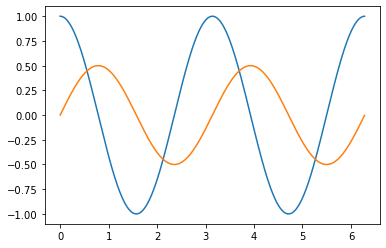

In [2]:
def derivative(y, T):
    n = len(y)
    b = np.zeros(n, dtype=complex)
    b[:n//2] = np.arange(n//2)
    b[n//2+1:] = np.arange(1-n//2, 0) 
    return np.fft.ifft(2j*np.pi/T * b * np.fft.fft(y))

def primitive(y, T):
    n = len(y)
    b = np.zeros(n, dtype=complex)
    b[:n//2] = np.arange(n//2)
    b[n//2+1:] = np.arange(1-n//2, 0) 
    b[n//2] = 10e100
    b[0] = 10e100
    return ifft(fft(y) / (2j*np.pi/T * b))
    
def error(y, x):
    e = max(abs(x - y).flat)/max(abs(x).flat)
    print("Error : ", e)
    
    
T = 2*np.pi
n = 2048
tj = T/n*np.arange(n)
yj = np.cos(2*tj)
plt.plot(tj, yj)
plt.plot(tj, primitive(yj, T).real)
print(max(primitive(yj, T).real))

# 2D FFTs

$$ a_{k_1, k_2} = \sum_{j_1=0}^{n_1-1}\sum_{j_2=0}^{n_2-1}f(t_{j_1}, t_{j_2}) e^{-\frac{2i \pi j_1 k_1}{n_1}}e^{-\frac{2i \pi j_2 k_2}{n_2}}$$

$$
f(t_{k_1}, t_{k_2}) = \frac{1}{n_1n_2}\sum_{j_1=0}^{n_1-1}\sum_{j_2=0}^{n_2-1}a_{k_1, k_2} e^{\frac{2i \pi j_1 k_1}{n_1}}e^{\frac{2i \pi j_2 k_2}{n_2}}
$$

In [3]:
def fft2(x):
    (n1, n2) = x.shape
    a = np.zeros((n1, n2), dtype=complex)
    for i in range(n1):
        a[i,:]=fft(x[i,:])
    for j in range(n2):
        a[:,j]=fft(a[:,j])
    return a

def ifft2(x):
    (n1, n2) = x.shape
    a = np.zeros((n1, n2), dtype=complex)
    for i in range(n1):
        a[i,:]=ifft(x[i,:])
    for j in range(n2):
        a[:,j]=ifft(a[:,j])
    return a

In [4]:
def diff_x(x, L1, L2):
    (n1,n2) = np.shape(x)
    a = np.zeros((n1, n2), dtype=float)
    for j in range(n2):
        a[:,j]=derivative(x[:, j], L1).real
    return a

def diff_y(x, L1, L2):
    (n1,n2) = np.shape(x)
    a = np.zeros((n1, n2), dtype=float)
    for i in range(n1):
        a[i,:]=derivative(x[i, :], L2).real
    return a

In [5]:
def lico(x, y):
    return x.reshape(len(x), 1) @ y.reshape(1, len(y))

def laplace(y, L1, L2):
    Y = np.fft.fft2(y)
    (n1, n2) = u.shape
    k1 = np.arange(n1)
    k1[n1//2+1:] -= n1
    k2 = np.arange(n2)
    k2[n2//2+1:] -= n2
    
    k1 = (2*np.pi/L1*k1)**2
    k2 = (2*np.pi/L2*k2)**2
    K1 = lico(k1, np.ones(n2))
    K2 = lico(np.ones(n1), k2)
    
    K = K1+K2
    
    U = -K * Y
    
    return np.fft.ifft2(U)

def inv_laplace(u, L1, L2):
    U = np.fft.fft2(u)
    (n1, n2) = u.shape
    
    k1 = np.arange(n1)
    k1[n1//2+1:] -= n1
    k2 = np.arange(n2)
    k2[n2//2+1:] -= n2
    
    k1 = (2*np.pi/L1*k1)**2
    k2 = (2*np.pi/L2*k2)**2
    K1 = lico(k1, np.ones(n2))
    K2 = lico(np.ones(n1), k2)
    
    K = K1+K2
    K[0, 0] = 10e20
    
    Y = -U / K
    
    return np.fft.ifft2(Y)

0.041501156819901554
Error :  3.406491771278051e-16


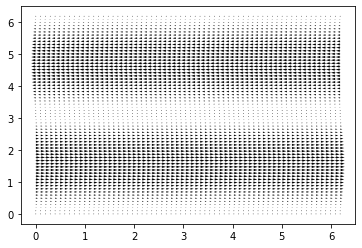

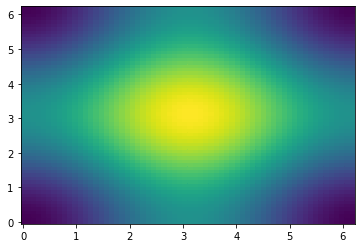

In [48]:
n1 = 64
L1 = 2*np.pi
x1 = L1/n1*np.arange(n1)
n2 = 64
L2 = 2*np.pi
x2 = L2/n2*np.arange(n2)
nu = 0.02
dt = 0.02
dx = L1/n1
print(nu*dt/dx/dx)

X = lico(x1, np.ones(n2))
Y = lico(np.ones(n1), x2)

u = lico(np.ones(n1), np.sin(x2))
v = np.zeros((n1, n2))

w = -lico(np.ones(n1), np.cos(x2)) # la flemme de le faire informatiquement

w = w + w.T
error(inv_laplace(laplace(w, L1, L2), L1, L2), w)

plt.quiver(X, Y, u, v)
plt.show()
plt.pcolor(X, Y, w)
plt.show()

$\omega = \partial_xv-\partial_yu$

$\triangle \psi = -\omega$

$u=\partial_y\psi$

$v=-\partial_x\psi$

$\partial_t\omega + u\partial_x\omega + v\partial_y\omega = \nu \triangle \omega$

In [51]:
for t in range(500):
    psi = inv_laplace(-w, L1, L2).real
    u = diff_y(psi,L1,L2)
    v = -diff_x(psi,L1,L2)
    udxw = u * diff_x(w, L1, L2)
    vdyw = v * diff_y(w, L1, L2)
    nulapw = nu * laplace(w, L1, L2).real
    dtw = nulapw - udxw - vdyw
    w += dt * dtw

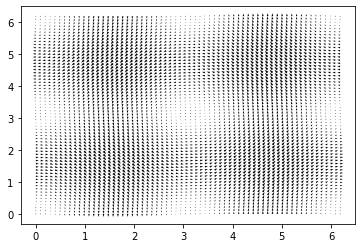

In [52]:
plt.quiver(X, Y, u, v)
plt.show()

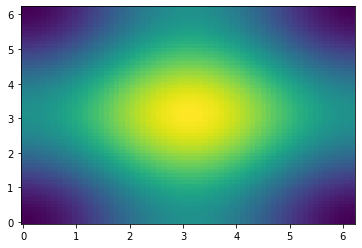

In [53]:
plt.pcolor(X, Y, w)
plt.show()